In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy



C:\Users\Shreyansh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
median=train_data['Age'].median()
median

28.0

In [7]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
train_data['Embarked']=train_data['Embarked'].fillna('S')

In [9]:
train_data['Age']=train_data['Age'].fillna(median)


In [10]:
passengers=train_data['PassengerId']

data=train_data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)


In [11]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
passengers1=test_data['PassengerId']
df2=pd.DataFrame({'PassengerId':passengers1})
df2

,PassengerId
0,892
1,893
2,894
3,895
4,896
5,897
6,898
7,899
8,900
9,901


In [14]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].median())

data1=test_data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)


In [15]:
Y=data['Survived']
data=data.drop(['Survived'],axis=1)
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,28.0,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [16]:
features=['Sex','Embarked']

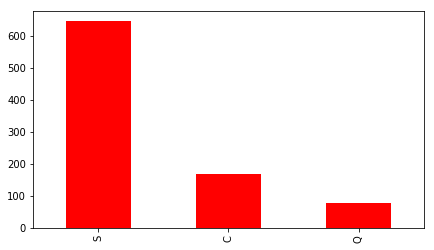

In [17]:
%matplotlib inline
ax = data['Embarked'].value_counts().plot(kind='bar',figsize=(7,4),color='r')
plt.show()

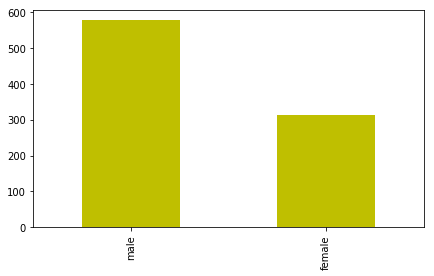

In [18]:
%matplotlib inline
ax = data['Sex'].value_counts().plot(kind='bar',figsize=(7,4),color='y')
plt.show()

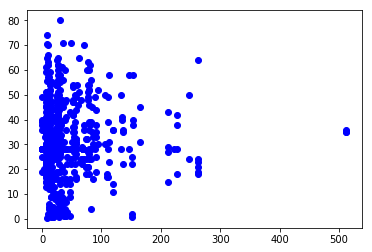

In [19]:
plt.plot(data['Fare'],data['Age'],'bo')
plt.show()

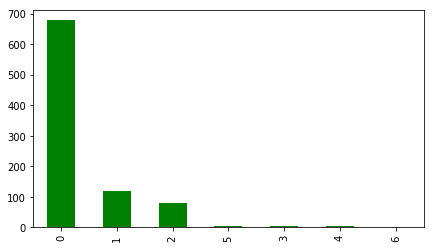

In [20]:
%matplotlib inline
ax = data['Parch'].value_counts().plot(kind='bar',figsize=(7,4),color='g')
plt.show()

In [21]:
for i in features:
    le=preprocessing.LabelEncoder()
    le.fit(data[i])
    le.transform(data[i])
    data[i]=le.fit_transform(data[i])

In [24]:

rf=RandomForestClassifier()
rf.fit(data,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
for j in features:
    LE=preprocessing.LabelEncoder()
    LE.fit(data1[j])
    LE.transform(data1[j])
    data1[j]=LE.fit_transform(data1[j])

In [26]:
pred=rf.predict(data1)
df = pd.DataFrame({'Survived': pred})
df

,Survived
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [27]:
result = pd.concat([df2, df], axis=1, join='inner')
 

In [378]:
result.to_csv('gender__submission.csv')